In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
from scipy.stats import norm

In [2]:
data = pd.read_csv("./total_top_2000_uri.csv", header=0, index_col=[0])
data = data.rename(columns=dict(zip(data.columns[4:], list(range(1999,2019)))))
data = data.replace(0, 2001)

## 1. Songs that achieved top N positions throught the years

In [3]:
"""During the whole 20 years of the Top2000 only these songs have ever managed a topN ranking"""
def top_hits(data, year, top_n):
    return data.loc[data[year] <=top_n]

tops = []
for year in data.columns[4:]:
    for song in top_hits(data, year, 5).title.values:
        if song not in tops:
            tops.append(song)

In [4]:
tops

['Bohemian Rhapsody',
 'Hotel California',
 'Child In Time',
 'Stairway To Heaven',
 'Paradise By The Dashboard Light',
 'Avond',
 'Imagine',
 'Mag Ik Dan Bij Jou',
 'Piano Man',
 'Wish You Were Here']

## 2. Basic plot of rankings of songs using index

In [5]:
def rankings(rank):
    #return ranking position over years for the song
    #ranked at that particular position using song index  
    return data.iloc[rank, 4:]

def title(rank):
    #return title of Song, Band
    return data.iloc[rank,0]

def title2(rank):
    return data.iloc[rank,1]

def ranking_statistics(rank):
    #return min, max, mean and deviation
    #after filtering out years it wasnt included in the TOP2000
    '''PLACEHOLDER RANK FOR YEARS NOT INCLUDED IS 2001 INSTEAD OF 0'''
    x =[i for i in rankings(rank) if i <2001]
    return min(x), max(x), np.mean(x), np.std(x)

def plot(rank):
    #plot each songs performance over the years
    y = rankings(rank)
    x = y.index.values
    low, high, avg, std = ranking_statistics(rank)
    
    plt.scatter(x, y)
    plt.plot(x, y, label = title(rank) + " ("+ title2(rank) + ")")
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Rank")
    plt.xlim(x[0],x[-1])
    plt.xticks(np.arange(1999, 2019, step=2))
    plt.ylim(top=0, bottom = high)
    plt.tight_layout()

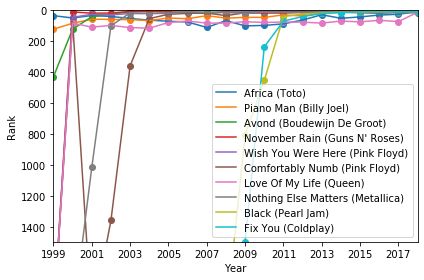

In [6]:
for i in data[data[2018]<15].index[4:]:
    plot(i)

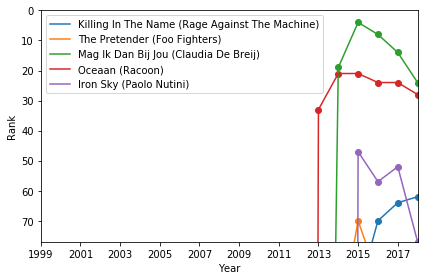

In [7]:
for i in data[((data[2018]<100) & (data[2015]<100)) & (data[2009]==2001)].index[4:]:
    plot(i)

In [8]:
def st_dev_distribution(r):
    # plots the deviation of song rankings
    
    dev = []
    for index in data.index[:r]:
        dev.append(ranking_statistics(index)[3])
    plt.hist(dev, bins =r//2)
    
#st_dev_distribution(6)

# 3. NEW YEARLY ENTRIES AND SONGS THAT FALL OUT OF TOP2000

In [9]:
def yearly_unique(unique):
    
    """for each year parse through the database and append
    the unique TOP2000 of that year by their index """
    
    #yearly = []
    yearly_2000 = []
    for year in unique.columns[4:]:
        #yearly.append(unique[unique[year] < 2001][year])
        yearly_2000.append(np.array(unique[unique[year] < 2001][year].index))
        
    return yearly_2000

def new_entries(data):
    
    """Gets TOP2000 of each year and compares that 2000 with the one of the previous year
    then it finds which ones are new entries and stores those in a list."""
    
    n_entry = []
    years  = len(data)-1

    for index in range(0,years):
        n_entry.append(set(data[index+1]).difference(set(data[index])))
        
    return n_entry


def out_of_Top2000(data,year):
    
    """Gets TOP2000 of each year and compares that 2000 with the one of the previous year
    then it finds which ones are new entries and stores those in a list."""
    return data[(data[year]<2000) & (data[year+1]>2000)]



In [10]:
n_entry = [list(i) for i in new_entries(yearly_unique(data))]
out_of2000 = [list(out_of_Top2000(data, i).index) for i in range(1999,2018)]

In [11]:
a = np.array([len(i) for i in n_entry])
print('Average new entries: ', a.mean())
print('Least amount of new entries: ', min(a))
print('Most amount of new entries: ', max(a))
print('Standard deviation of new entries: ', a.std())

Average new entries:  211.52631578947367
Least amount of new entries:  91
Most amount of new entries:  612
Standard deviation of new entries:  122.96699104404641


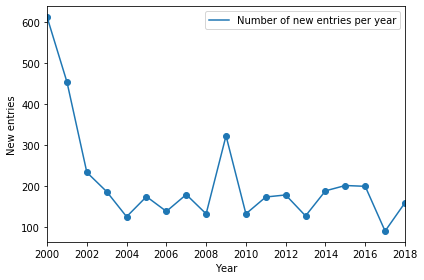

In [12]:
'''hardcoded the years but return a plot of number of new entries per year starting from 2000-2019'''

x = list(range(2000,2019))
y = [len(i) for i in n_entry]

plt.scatter(x, y)
plt.plot(x, y, label = 'Number of new entries per year')
plt.legend()
plt.xlabel("Year")
plt.ylabel("New entries")
plt.xlim(x[0],x[-1])
plt.tight_layout()

# 3.1. Track features changes of new entries vs old tracks

In [13]:
df = pd.read_csv("full_top_2000_audio_features.csv", header=0, index_col=[0])
df = df.drop(df.columns[:-8], axis=1)

In [14]:
#df
new = []
old = []
dif = []
for i in range(len(out_of2000)):
    new.append(df.iloc[n_entry[i]].mean())
    old.append(df.iloc[out_of2000[i]].mean())
    dif.append(df.iloc[n_entry[i]].mean() - df.iloc[out_of2000[i]].mean())

In [15]:
dif = np.array(dif)

In [16]:
track_feature_changes = pd.DataFrame(data = dif.transpose(),index = df.columns, columns = range(2000, 2019))

In [17]:
track_feature_changes

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
acousticness,-0.142772,0.096542,-0.017766,0.099755,-0.046695,0.046842,-0.014180,0.027550,-0.064178,-0.093136,-0.001372,-0.068397,-0.050796,-0.025167,-0.108916,-0.113701,-0.093324,-0.133270,-0.015323
danceability,0.010624,-0.008207,-0.011171,-0.034417,-0.009627,-0.062516,-0.023978,-0.034139,-0.006579,0.018334,-0.012248,0.005843,0.021480,0.043187,-0.003921,0.021965,0.025103,-0.071912,0.063756
duration_ms,14685.406863,1359.107930,37214.149573,1803.711230,34971.650794,26803.395698,2332.352518,15543.705556,-19498.518797,36875.674923,-17621.172932,33428.361737,16491.497207,20047.343750,35852.248677,22025.801980,24104.700000,-9300.494505,193.412500
energy,0.101429,-0.071263,0.011750,-0.046839,0.011245,-0.034921,-0.033606,0.003227,-0.031011,0.097140,-0.012923,0.027691,0.038603,0.064591,0.070682,0.097880,0.081378,-0.037238,0.077240
instrumentalness,0.023460,-0.019282,0.002065,0.006712,-0.011691,-0.003365,0.000937,-0.000024,0.015392,0.001073,0.001840,-0.013422,0.019820,-0.023874,0.041317,-0.006412,0.009711,-0.003012,0.000925
loudness,1.109090,-0.975568,-0.094709,-0.625037,0.012825,0.078028,0.624014,0.909656,-0.473060,1.582991,0.282977,1.177816,0.848117,0.750953,1.207265,1.299520,0.679967,0.835659,0.784269
speechiness,0.002254,-0.000558,-0.005182,-0.004821,-0.001796,-0.006617,-0.004954,-0.005864,0.003515,-0.002605,-0.003161,0.002010,0.003813,0.010491,0.008062,0.022513,0.009531,0.004175,0.011568
valence,0.045739,-0.076542,-0.033315,-0.077298,-0.050635,-0.102866,-0.098935,-0.099958,0.061733,-0.064841,0.029346,-0.110146,-0.026313,-0.011003,-0.056567,-0.058828,-0.002833,-0.028862,-0.006295


In [18]:
def data_plotter(feature, feature_values):
    year_range = track_feature_changes.columns
    plt.plot(year_range, feature_values, '-o')
    plt.title(feature + ' change between new and old entries')
    plt.xscale('linear')
    plt.xlabel("Year")
    plt.ylabel(feature)
    plt.xscale("linear")
    plt.xticks(np.arange(1999, 2019, step=2))
    plt.show()

In [19]:
#for index,values in track_feature_changes.iterrows():
#    data_plotter(index, values)

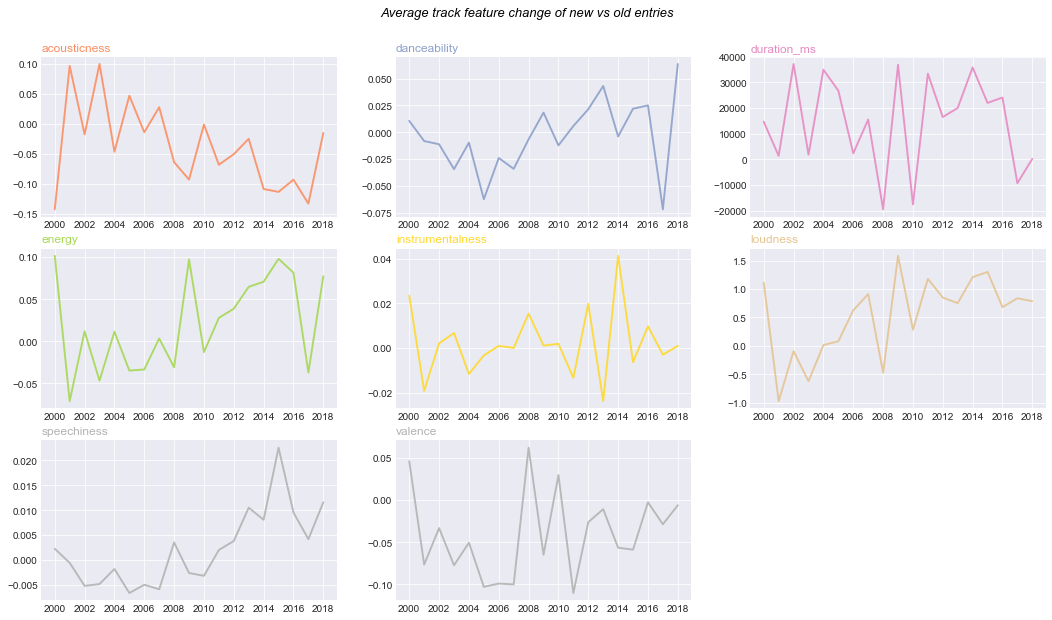

In [20]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(18,10))
 
# create a color palette
palette = plt.get_cmap('Set2')

# Create a np array of the years
year_range = np.arange(2000, 2019, dtype=np.int)

# multiple line plot
num=0

for index,values in track_feature_changes.iterrows():

    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(year_range, values, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=index)
    plt.xticks(np.arange(year_range[0], year_range[-1]+1, step=2))
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(index, loc='left', fontsize=12, fontweight=0, color=palette(num))

# general title
plt.suptitle("Average track feature change of new vs old entries", fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

# Axis title
# plt.text(0.5, 0.04, 'Year', ha='center', va='center')
# plt.text(0.06, 0.5, 'Feature value', ha='center', va='center', rotation='vertical')

plt.show()

# 3.2. Regressions over changes

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#track_feature_changes.iloc[:,1:]
#year_range[1:]

In [23]:
X= year_range[1:].reshape(-1,1)
reg = LinearRegression()

for y in track_feature_changes.iloc[:,1:].values:
    reg.fit(X,y)
    print(reg.score(X, y))

0.4931404237379873
0.19005238799758006
0.005591949845432986
0.40852030756141167
0.05010291649841214
0.4810587297998931
0.58378116452817
0.1306051245619534


## 4. ALL-TIME CLASSICS

(array([  4.,   0.,  20., 125., 445., 497., 348., 213., 154., 194.]),
 array([1936. , 1943.4, 1950.8, 1958.2, 1965.6, 1973. , 1980.4, 1987.8,
        1995.2, 2002.6, 2010. ]),
 <a list of 10 Patch objects>)

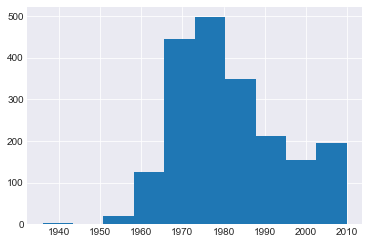

In [25]:
'''Distribution of release date for songs'''
plt.hist(data[data[2010] <2001].year)

In [26]:
#plt.plot(sts.stdev())

In [27]:
#[sts.mean(data[data[i] <2001].year) for i in data.columns[4:]]
#plt.hist([data[data[i] <2001].year for i in data.columns[4:7]])

In [28]:
def year(start_year):
    '''Creates an index of the year, as to use a subset of all years'''
    count =0
    for index in data.columns ==start_year:
        if index == False:
            count+=1
        else:
            return count
        
def classics(data, start_year):
    '''Çreates a dataframe with songs that were always in the top2000, given that start year'''
    classic = []
    for index,row in data.iloc[:,year(start_year):].iterrows():
        if pd.Series(row <2001).all():
            classic.append(index)
    return classic

In [29]:
for date in list(range(1999,2012)):
    print('Songs that stayed in the top2000 since ' + str(date) + ': ', len(classics(data, date)))

Songs that stayed in the top2000 since 1999:  620
Songs that stayed in the top2000 since 2000:  716
Songs that stayed in the top2000 since 2001:  813
Songs that stayed in the top2000 since 2002:  861
Songs that stayed in the top2000 since 2003:  900
Songs that stayed in the top2000 since 2004:  915
Songs that stayed in the top2000 since 2005:  984
Songs that stayed in the top2000 since 2006:  1017
Songs that stayed in the top2000 since 2007:  1046
Songs that stayed in the top2000 since 2008:  1051
Songs that stayed in the top2000 since 2009:  1170
Songs that stayed in the top2000 since 2010:  1191
Songs that stayed in the top2000 since 2011:  1268


In [30]:
top4 =[]
for index, value in data.loc[classics(data, 1999)].iloc[:5,4:].iterrows():
    top4.append(value.mean())

In [31]:
top4

[1.2, 2.3, 3.95, 4.05, 13.15]

In [32]:
data.loc[classics(data, 1999)].iloc[:5,:]

,title,artist,track_uri,year,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bohemian Rhapsody,Queen,4u7EnebtmKWzUH433cf5Qv,1975,1,1,1,1,1,1,...,1,2,1,1,1,2,2,1,1,1
1,Hotel California,Eagles,40riOy7x9W7GXjyGp4pjAv,1977,2,4,3,3,2,2,...,2,1,2,2,2,1,3,2,2,2
2,Child In Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,1972,3,2,2,2,3,3,...,5,4,3,4,4,4,8,5,5,6
3,Stairway To Heaven,Led Zeppelin,5CQ30WqJwcep0pYcV4AMNc,1971,4,3,4,4,4,4,...,4,5,5,3,3,3,5,3,3,4
4,Paradise By The Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,1978,5,5,5,5,5,6,...,12,9,11,19,22,17,30,27,27,29


In [33]:
cls = []
for date in list(range(1999,2012)):
    cls.append(len(classics(data, date)))

No handles with labels found to put in legend.


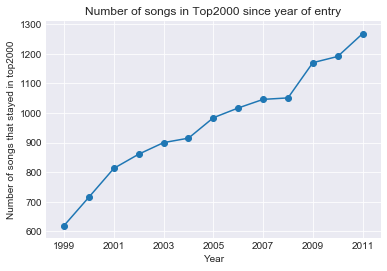

In [34]:
plt.plot(range(1999,2012),cls)
plt.scatter(range(1999,2012),cls)
plt.legend()
plt.xlabel("Year")
plt.ylabel('Number of songs that stayed in top2000')
plt.title('Number of songs in Top2000 since year of entry')
plt.xticks(range(1999,2012,2))
plt.show()


## 4.1. Average rank

In [35]:
average_rank = dict()
for index, value in data.loc[classics(data, 2003)].iloc[:,5:].iterrows():
    average_rank[index] = value.mean()

#{k: v for k, v in sorted(average_rank.items(), key=lambda item: item[1])}

In [102]:
df4 = pd.DataFrame(data.loc[classics(data, 2003)])

In [73]:
df4['avg_rank'] =np.nan

In [105]:
avg =[]
std = []
for index, value in df4.iloc[:,8:].iterrows():
    #print(sts.stdev(value))
    avg.append(value.mean())
    
for index, value in df4.iloc[:,8:].iterrows():
    std.append(sts.stdev(value))

df4['avg_rank'] = avg
df4['st_dev'] = std


In [106]:
df4 = df4.sort_values('avg_rank')

In [110]:
#df4.iloc[:12,:]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


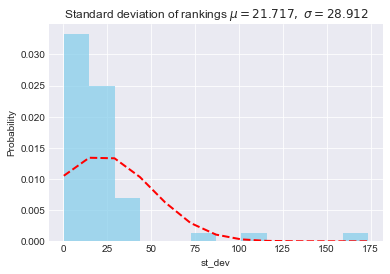

In [116]:
def histogram(df, column, title):
    # best fit of data
    (mu, sigma) = norm.fit(df[column])

    # the histogram of the data
    n, bins, patches = plt.hist(df[column], 12, normed=1, color='skyblue', alpha=0.75)

    # add a 'best fit' line
    y = norm.pdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    #plot
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.title(title + r' $ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)

    plt.show()
    
    
histogram(df4.iloc[:50,:], 'st_dev', 'Standard deviation of rankings')

In [ ]:
df4.artist.value_counts()[:10]

## 4.2. Average track features for All-Time Classics

In [42]:
df2 = pd.DataFrame(data =pd.read_csv("full_top_2000_audio_features.csv", header=0, index_col=[0]))

In [43]:
df2.head()

,title,artist,track_uri,year,pos1999,pos2000,pos2001,pos2002,pos2003,pos2004,...,pos2017,pos2018,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence
0,Bohemian Rhapsody,Queen,4u7EnebtmKWzUH433cf5Qv,1975,1,1,1,1,1,1,...,1,1,0.27100,0.414,354320,0.404,0.000000,-9.928,0.0499,0.224
1,Hotel California,Eagles,40riOy7x9W7GXjyGp4pjAv,1977,2,4,3,3,2,2,...,2,2,0.00574,0.579,391376,0.508,0.000494,-9.484,0.0270,0.609
2,Child In Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,1972,3,2,2,2,3,3,...,5,6,0.31300,0.331,619267,0.340,0.607000,-14.784,0.0369,0.365
3,Stairway To Heaven,Led Zeppelin,5CQ30WqJwcep0pYcV4AMNc,1971,4,3,4,4,4,4,...,3,4,0.58000,0.338,482830,0.340,0.003200,-12.049,0.0339,0.197
4,Paradise By The Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,1978,5,5,5,5,5,6,...,27,29,0.21400,0.326,508333,0.872,0.000000,-7.602,0.1220,0.492


In [44]:
average_track_features = []
for date in list(range(1999,2019)):
    average_track_features.append(df2.loc[classics(data, date)].iloc[:,-8:].mean())

In [45]:
avg_classic_features = pd.DataFrame(data = np.array(average_track_features).transpose(),index = df.columns, columns = range(1999, 2019))

In [46]:
avg_classic_features

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
acousticness,0.348112,0.334727,0.343851,0.339712,0.340975,0.342707,0.346083,0.340860,0.339762,0.338821,0.326538,0.324300,0.314692,0.314504,0.314408,0.300119,0.292433,0.283245,0.278188,0.276244
danceability,0.516773,0.522726,0.520401,0.521096,0.518422,0.518627,0.512963,0.510315,0.507783,0.508631,0.507473,0.506819,0.507556,0.505991,0.508173,0.506575,0.509459,0.509121,0.507468,0.512921
duration_ms,256270.924194,257839.041899,255638.808118,258989.397213,258176.025556,258685.111475,259794.946138,258844.545723,258240.730402,258350.895338,256429.054701,255841.301427,256443.055205,254946.711903,254446.571950,253281.142857,253728.549200,253721.113559,251445.816848,251082.681000
energy,0.535219,0.546446,0.538047,0.540053,0.537696,0.535808,0.531559,0.530646,0.530026,0.531404,0.540828,0.539724,0.544280,0.542936,0.544759,0.551808,0.561302,0.567688,0.566962,0.572748
instrumentalness,0.047108,0.050548,0.047894,0.050137,0.048510,0.047951,0.047563,0.046827,0.048248,0.048536,0.047942,0.047112,0.046275,0.045824,0.044733,0.046923,0.045871,0.047435,0.046678,0.046328
loudness,-10.033402,-9.926828,-10.028668,-10.050187,-10.007228,-10.014474,-9.941421,-9.870824,-9.823170,-9.810826,-9.530850,-9.502291,-9.365024,-9.292920,-9.249127,-9.028130,-8.907932,-8.804084,-8.698064,-8.643797
speechiness,0.045777,0.045098,0.044803,0.045100,0.044732,0.044579,0.043927,0.043982,0.043662,0.043718,0.043308,0.043177,0.043541,0.043258,0.043978,0.044516,0.046667,0.047352,0.047260,0.048500
valence,0.526054,0.532344,0.526149,0.526615,0.521826,0.519797,0.508786,0.505491,0.501915,0.502203,0.496678,0.494547,0.488672,0.484800,0.483720,0.479037,0.478391,0.476515,0.475994,0.479028


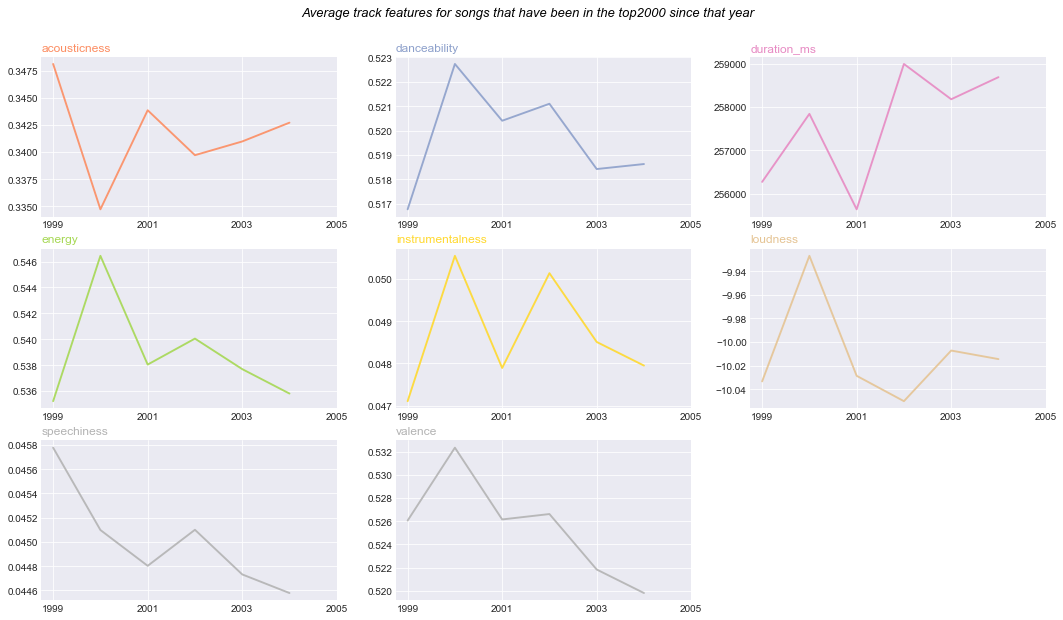

In [47]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(18,10))
 
# create a color palette
palette = plt.get_cmap('Set2')

# Create a np array of the years
year_range = np.arange(1999, 2019, dtype=np.int)[:6]

# multiple line plot
num=0

for index,values in avg_classic_features.iloc[:,:6].iterrows():

    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(year_range, values, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=index)
    plt.xticks(np.arange(year_range[0], year_range[-1]+2, step=2))
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(index, loc='left', fontsize=12, fontweight=0, color=palette(num))

# general title
plt.suptitle("Average track features for songs that have been in the top2000 since that year", fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

plt.show()

## 5. Artists death and rankings

In [48]:
artist = pd.read_csv("./total_top_2000_uri.csv", header=0, index_col=[0])
artist = artist.rename(columns=dict(zip(artist.columns[4:], list(range(1999,2019)))))

In [49]:
artist

,title,artist,track_uri,year,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bohemian Rhapsody,Queen,4u7EnebtmKWzUH433cf5Qv,1975,1,1,1,1,1,1,...,1,2,1,1,1,2,2,1,1,1
1,Hotel California,Eagles,40riOy7x9W7GXjyGp4pjAv,1977,2,4,3,3,2,2,...,2,1,2,2,2,1,3,2,2,2
2,Child In Time,Deep Purple,21cp8L9Pei4AgysZVihjSv,1972,3,2,2,2,3,3,...,5,4,3,4,4,4,8,5,5,6
3,Stairway To Heaven,Led Zeppelin,5CQ30WqJwcep0pYcV4AMNc,1971,4,3,4,4,4,4,...,4,5,5,3,3,3,5,3,3,4
4,Paradise By The Dashboard Light,Meat Loaf,2g7gviEeJr6pyxO7G35EWQ,1978,5,5,5,5,5,6,...,12,9,11,19,22,17,30,27,27,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,Have You Ever Been Mellow,Party Animals,6BUqtfhP3jZOzM9sPHCnfK,1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962
4425,Gold,Prince,68XDZSuCJdT8ld3W48F4Fk,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1963
4426,Find The River,R.E.M.,1e3Q7gE5TRUklXOlZFKIrv,1992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1980
4427,Banana Pancakes,Jack Johnson,0BgbobvykXxEvxo2HhCuvM,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986


In [50]:
#for year in data.columns[4:]:
    #print(data[data.artist == 'George Michael'][year].mean())
    #print(data[data.artist == 'George Michael'][year]<2001)
    #print(data[data.artist == 'Michael Jackson'][year].mean())
    #print(data[data.artist == 'David Bowie'][year].mean())
    

In [51]:
deaths = ['Michael Jackson','Prince', 'Amy Winehouse', 'David Bowie', 'Whitney Houston', 'George Michael', 'Aretha Franklin', 'Linkin Park']

In [52]:
from matplotlib.pyplot import figure

In [53]:
def plot2(rank, start_year =1999, end_year =2019, data=data):
    #plot each songs performance over the years
    figure(num=5, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    y = rankings(rank).loc[range(start_year, end_year)]
    x = range(start_year, end_year)
    low, high, avg, std = ranking_statistics(rank)
    
    plt.scatter(x, y)
    plt.plot(x, y, label = title(rank))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title2(rank))
    plt.xlabel("Year")
    plt.ylabel("Rank")
    plt.xlim(x[0],x[-1])
    plt.xticks(np.arange(x[0]-1,x[-1]+2, step=2))
    plt.ylim(top=0, bottom = high)

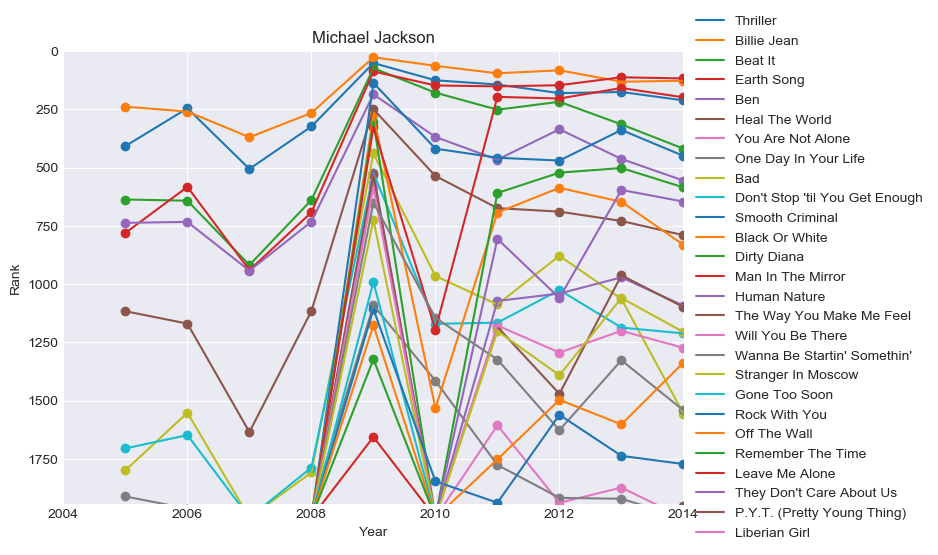

In [54]:
for index, value in data[data.artist == deaths[0]].iloc[:,4:].iterrows():
    plot2(index, 2005, 2015)

## 6. Most top2000 tracks and artists that produced them

In [55]:
artist_tracks = [data[data[year] < 2001]['artist'].value_counts()[data[data[year] < 2001]['artist'].value_counts() > 7] for year in list(range(1999,2019))]

In [56]:
legends=[]
for item in artist_tracks:
    for track in item[:10].index.values:
        if track not in legends:
            legends.append(track)

In [57]:
#artist_tracks[10]

In [58]:
#legends

In [59]:
#for item in legends:
#    plt.plot(artist_tracks[])
#artist_tracks

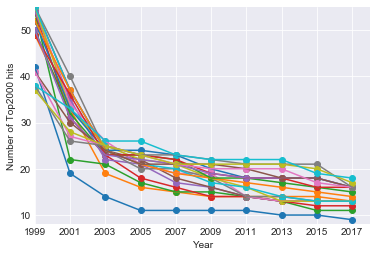

In [60]:
for item in artist_tracks:
    plt.scatter(np.arange(1999, 2019, step=2), item[:10])
    plt.plot(np.arange(1999, 2019, step=2), item[:10])
    #plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Number of Top2000 hits")
    plt.xlim(x[0],x[-1])
    plt.xticks(np.arange(1999, 2019, step=2))
    plt.ylim(top=55, bottom = 8)

In [1]:
artist_tracks[0][:5]

NameError: name 'artist_tracks' is not defined

In [62]:
#data[(data['artist']== 'Michael Jackson') & (data[1999] < 2001)][1999].count()
#for year in data.columns[4:]:
#    data[(data['artist'] == 'Michael Jackson') & (data[year] <2001)]

def top_charts(artist):
    charts = []
    years = list(data.columns[4:])
    for year in data.columns[4:]:
        charts.append(data[(data['artist']== 'Michael Jackson') & (data[year] < 2001)][year].count())
    return years, charts

In [63]:
legends2 = ['Michael Jackson','David Bowie' ]

In [64]:
for name in legends2[-4:-3]:
    x = top_charts(name)[0]
    y = top_charts(name)[1]
    plt.scatter(x,y)
    plt.plot(x, y, label = name)
    plt.title('Number fo Top2000 tracks')
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("New entries")
    plt.xlim(x[0],x[-1])
    plt.xticks(np.arange(1999, 2019, step=2))


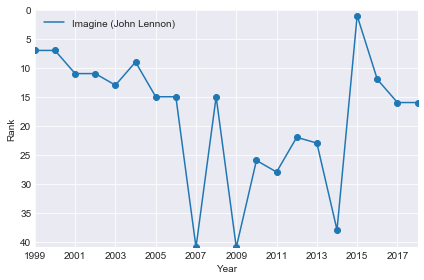

In [65]:
data[data['title'] == 'Imagine' ]
plot(6)

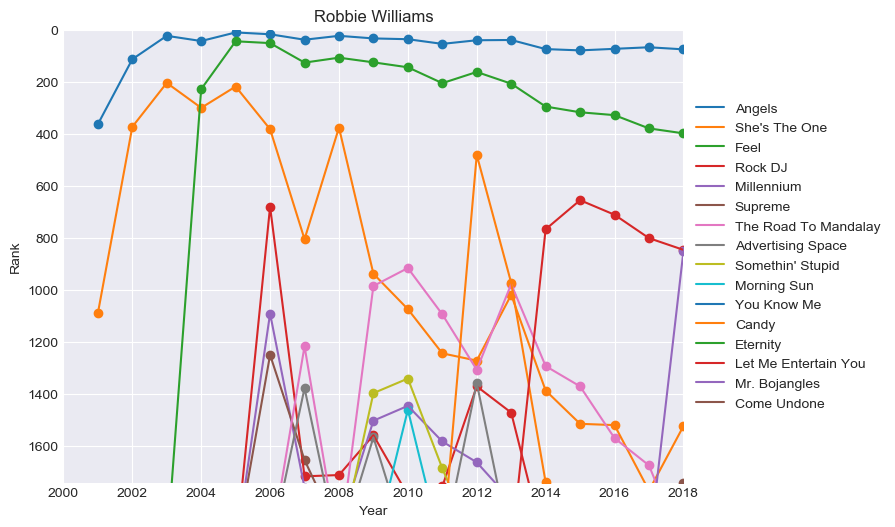

In [66]:
for index, value in data[data.artist == 'Robbie Williams'].iloc[:,10:].iterrows():
    plot2(index, 2001)


